<a href="https://colab.research.google.com/github/amoses-a/mice_protein_expression_ml/blob/main/mice_protein_expression_classification_and_hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

 Download the Mice Protein Expression Dataset and load it in Colab


In [7]:
#Mice Protein expression: https://archive.ics.uci.edu/dataset/342/mice+protein+expression
mice_protein_data = pd.read_csv("Data_Cortex_Nuclear.csv")

mice_df =pd.DataFrame(mice_protein_data)

#Index the class(target feature)
classes = mice_df["Genotype"]

#Dropping "Class", ‘Mouse-ID’, ‘Genotype’, ‘Treatment’
mice_df = mice_df.drop(columns=["class", "MouseID", "Genotype", "Treatment"])

#print(mice_df)
#print(classes)

mice_df

#classes.value_counts()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.190483,NaN,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,S/C
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.190463,NaN,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,S/C
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.216682,NaN,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,S/C
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.222263,NaN,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,S/C


Calculate the basic statistics for the dataset. Are there any missing values?

In [8]:
#Find NaNs and impute values
#mice_df.isna().sum()

missing_values = mice_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
NR1_N          3
NR2A_N         3
            ... 
H3AcK18_N    180
EGR1_N       210
H3MeK4_N     270
CaNA_N         0
Behavior       0
Length: 78, dtype: int64


In [9]:
#Replace missing values with Median imputation
features_name = mice_df.columns

#loop through columns to remove categorical columns and columns that are not NaN/null
for feature in features_name:
  if feature == "Behavior":
    continue
  elif mice_df[feature].isnull().sum() == 0:
    continue
  else:
    median_value = mice_df[feature].median()
    mice_df[feature] = mice_df[feature].fillna(median_value)

mice_df.isna().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Behavior     0
Length: 78, dtype: int64

In [10]:
#basic statistic
mice_df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425645,0.616959,0.319081,2.297267,3.843703,0.233163,0.181848,3.536524,0.212568,1.428480,...,0.226676,0.156810,0.133365,0.121521,0.130738,0.446073,0.167714,0.181540,0.202578,1.337784
std,0.249035,0.251304,0.049315,0.346810,0.931812,0.041577,0.027004,1.293415,0.032542,0.466270,...,0.028989,0.026555,0.023635,0.014276,0.023047,0.066432,0.054387,0.036406,0.048324,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.206389,...,0.206395,0.141045,0.119986,0.110839,0.114373,0.398082,0.133969,0.159168,0.174271,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197226,4.480652,0.234558,1.560931,...,0.241655,0.167584,0.139331,0.131955,0.142427,0.490773,0.187174,0.196133,0.219242,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [12]:
mice_df["Behavior"].value_counts()

S/C    555
C/S    525
Name: Behavior, dtype: int64

How many features are there in the dataset? Are they numerical or categorical?


In [13]:
print(mice_df.shape)
print(classes.shape)

#After dropping ‘Mouse-ID’, ‘Genotype’, ‘Treatment’ and ‘class’ columns

#78 Features: + 1 target features  = 79 features

#77 Numerical
#2 categorical i.e Behavior and target feature columns(Genotype)

(1080, 78)
(1080,)


Create boxplots of the following features: ‘H3MeK4_N’, ‘BRAF_N’ What can you observe about their
distributions?

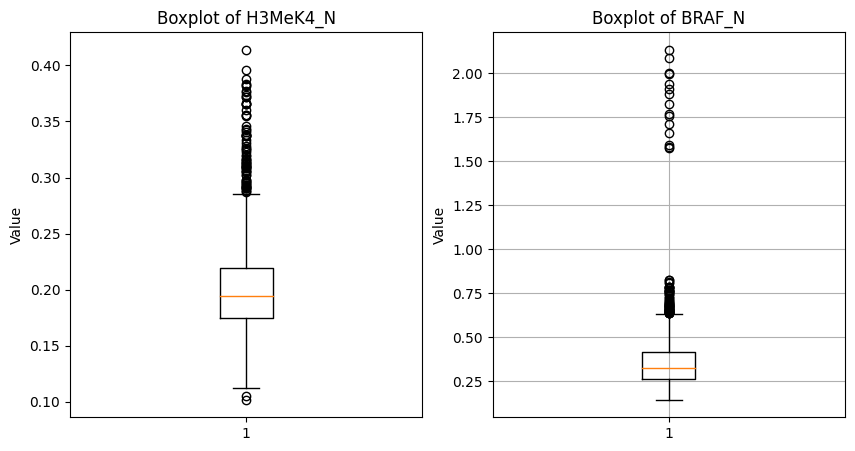

In [18]:
#function to create a box plot for features

fig, ax = plt.subplots(1,2, figsize =(10, 5))

ax[0].boxplot(mice_df["H3MeK4_N"])
ax[0].set_title('Boxplot of H3MeK4_N')
ax[0].set_xlabel('')
ax[0].set_ylabel('Value')
plt.grid(True)

# Plot the second feature
ax[1].boxplot(mice_df["BRAF_N"])
ax[1].set_title('Boxplot of BRAF_N')
ax[1].set_xlabel('')
ax[1].set_ylabel('Value')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

#When a box plot shows numerous outliers, it indicates that there are many data points in the feature
#that are far away from the median and the upper and lower quartiles.
#This can be due to the presence of extreme values or outliers in the data.

dtype('O')

 Calculate each class percentage in the dataset and characterize the dataset based on
balance/imbalance

Class Count:
Control    570
Ts65Dn     510
Name: Genotype, dtype: int64
Class Count in percentage(%):
Genotype
Control     52.8%
Ts65Dn      47.2%
dtype: object


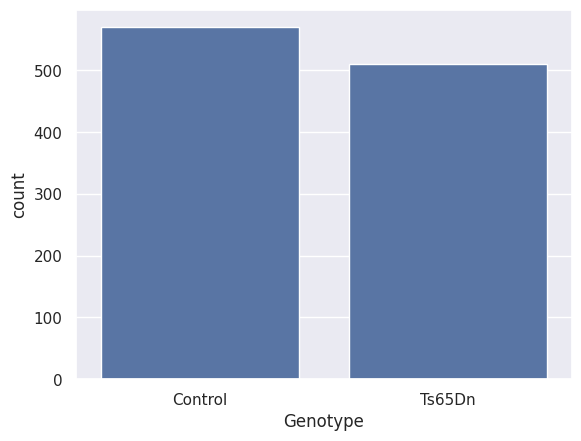

In [20]:
#class percentage in dataset

class_unique_count = classes.value_counts()
print("Class Count:")
print(class_unique_count)
classes_df = pd.DataFrame(classes)

#Class percentage
class_unique_counts = classes_df.value_counts(normalize=True)
percentage_counts = class_unique_counts.mul(100).round(1)

percentage_counts = percentage_counts.map('{:.1f}%'.format)

# Print the percentage counts with percentage sign
print("Class Count in percentage(%):")
print(percentage_counts)


sns.set_theme(style="darkgrid")
ax = sns.countplot(data=classes_df, x="Genotype")
plt.show()


#Data Sets in the class are imbalance

Calculate the correlations between the following pairs of features: ‘DYRK1A_N’, ‘SHH_N’ and
‘BCL2_N’, ‘pS6_N’.

<Axes: >

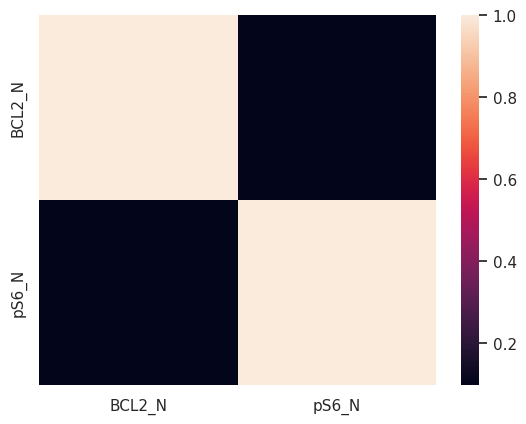

In [ ]:
#Correlation

corr_features1 = ["DYRK1A_N", "SHH_N"]

corr_features2 = ["BCL2_N", "pS6_N"]

mice_df1 = mice_df[corr_features1]
mice_df2 = mice_df[corr_features2]

# Calculate the correlation between the selected features/columns
correlation_matrix1 = mice_df1.corr()
correlation_matrix2 = mice_df2.corr()

#sns.heatmap(correlation_matrix1)
sns.heatmap(correlation_matrix2)


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert diagnosis column to numerical values
labelencoder = LabelEncoder()
class_labelencoder = LabelEncoder()

#Encode with unique values from 0, 1 or we could use map
mice_df["Behavior"] = labelencoder.fit_transform(mice_df["Behavior"])

mice_df["Behavior"].value_counts()

classes.value_counts()


c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

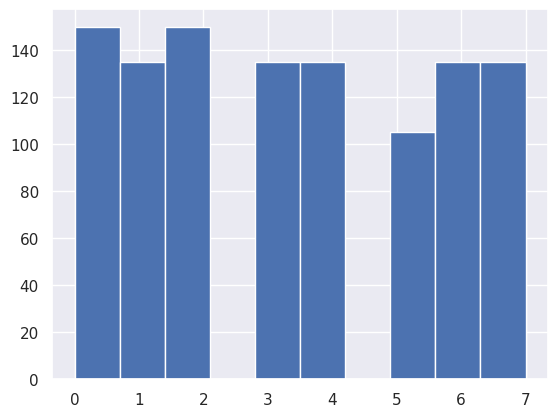

In [ ]:
#Converting categorical to numerical in target variables
classes_df = labelencoder.fit_transform(classes_df)

classes_df = pd.DataFrame(classes_df)

classes_df.value_counts()
plt.hist(classes_df)
plt.show()

In [ ]:
X = mice_df
y = classes_df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Size of training features:{X_train.shape}\nSize of testing features:{X_test.shape}')
print(f'Size of training labels:{y_train.shape}\nSize of testing labels:{y_test.shape}')

#Normalization of data between 0 and 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Size of training features:(864, 78)
Size of testing features:(216, 78)
Size of training labels:(864, 1)
Size of testing labels:(216, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

from sklearn.metrics import roc_auc_score

def train_eval(input_model, input_X_train, input_X_test, input_y_train, input_y_test):

  input_model.fit(input_X_train, input_y_train)

  # Make predictions on the test set
  y_pred = input_model.predict(input_X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')
  f1 = f1_score(y_test, y_pred, average='macro')
  #auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

  # Print the metrics
  print(f'Accuracy: {accuracy:.4f}')
  print(f'Precision: {precision:.4f}')
  print(f'Recall: {recall:.4f}')
  print(f'F1 Score: {f1:.4f}')
  #print(f'AUC: {auc:.4f}')

In [ ]:
from sklearn.svm import SVC

#Control trade off between smooth decision boundaries and classfiying training points correctly
svm_rbf = SVC(kernel='rbf', C =1)

train_eval(svm_rbf, X_train_scaled, X_test_scaled, y_train, y_test)



Accuracy: 0.9954
Precision: 0.9954
Recall: 0.9963
F1 Score: 0.9958


Sensitivity (Recall): This metric refers to the ability of the classifier to correctly identify mice with trisomy (positive cases). A high sensitivity ensures you don't miss any mice that actually have trisomy. In the context of medical diagnosis, missing a case (false negative) can be severe.

Specificity: This metric refers to the ability of the classifier to correctly identify mice without trisomy (negative cases). A high specificity ensures you don't mistakenly classify healthy mice as having trisomy (false positive).  False positives might lead to unnecessary procedures or treatment.